In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

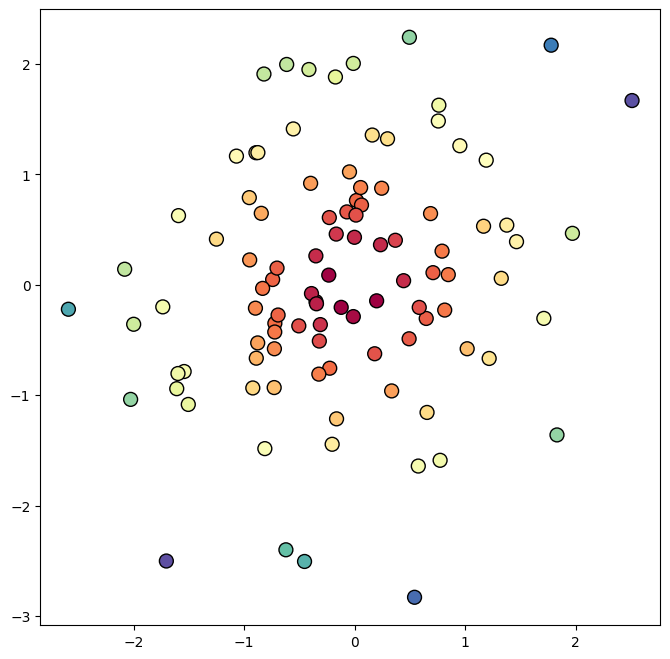

In [2]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='Spectral',edgecolors='k')

In [3]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

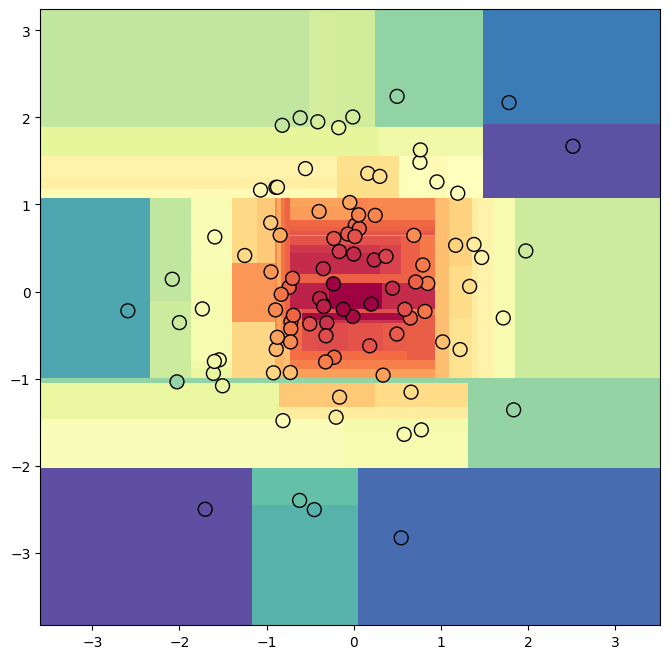

In [4]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='Spectral',edgecolors='k')

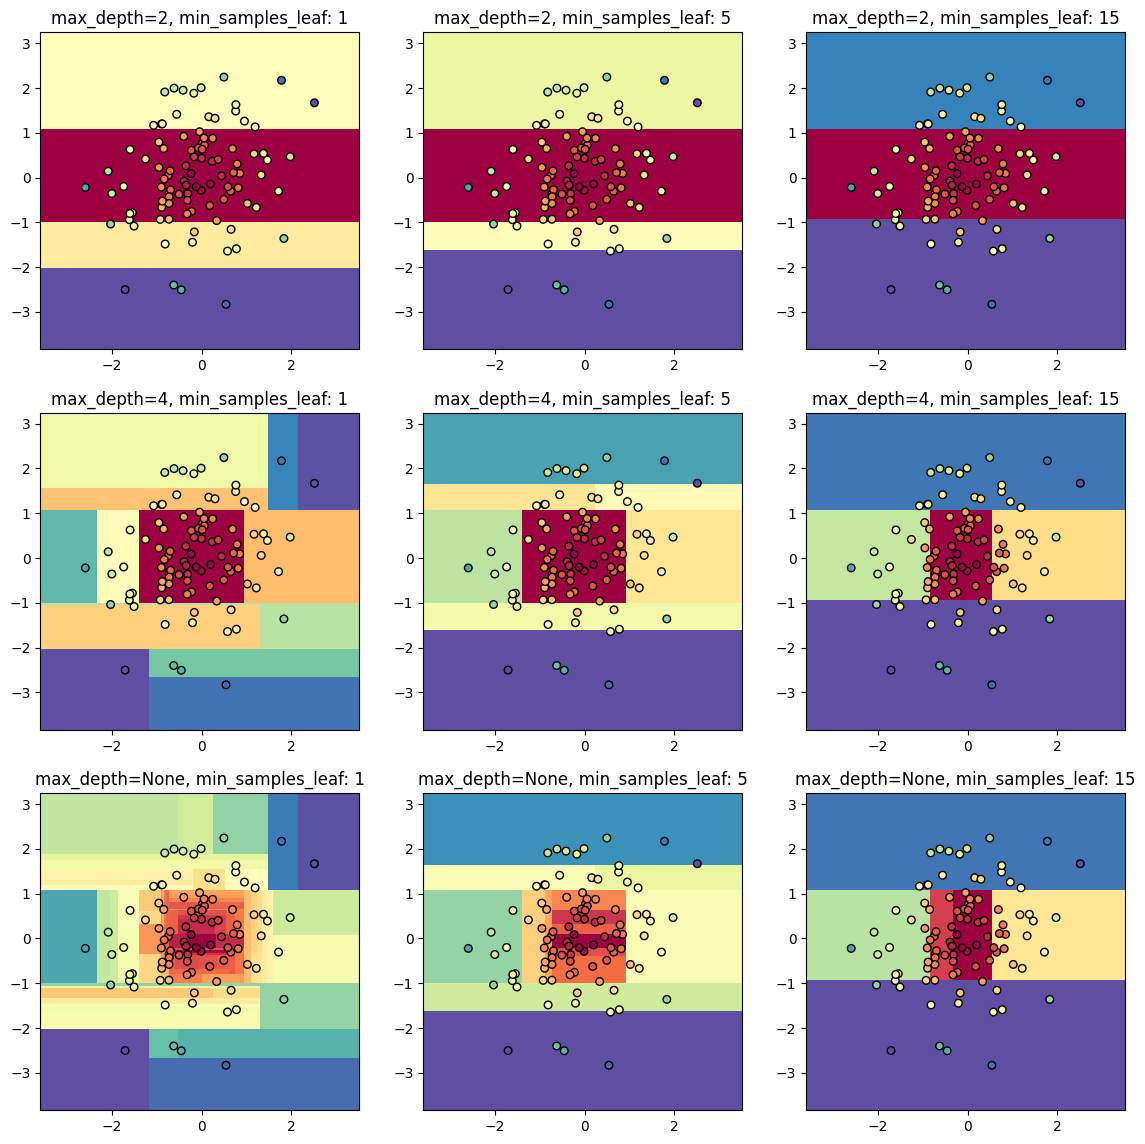

In [5]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='Spectral',edgecolors='k')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

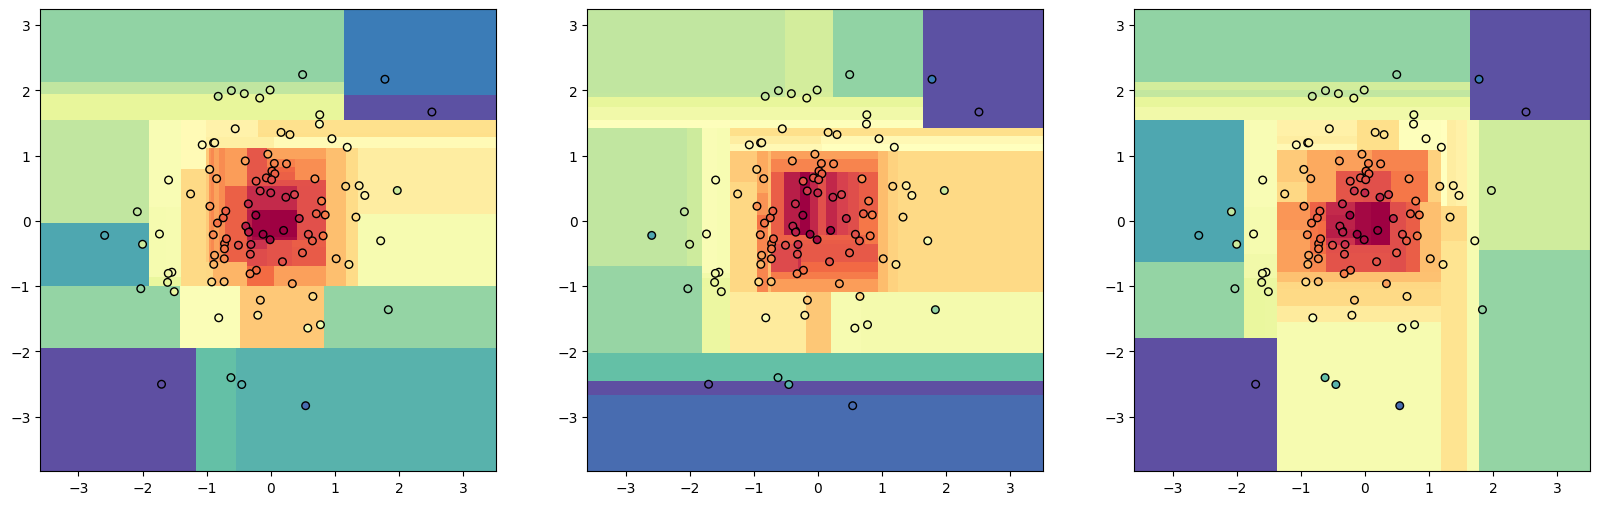

In [6]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='Spectral',edgecolors='k')

In [9]:
from sklearn.datasets import fetch_openml

# Загрузка данных о ценах на недвижимость в Бостоне
boston = fetch_openml(data_id=42165, as_frame=True)

X_full = boston.data
y_full = boston.target


In [10]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=42)

In [ ]:
X.shape,X_test.shape

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=42)

In [ ]:
regr = DecisionTreeRegressor(random_state=42)
print(-cross_val_score(regr, X, y, cv=cv, scoring='neg_mean_squared_error').mean())

In [ ]:
regr = DecisionTreeRegressor(random_state=42)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:

regr = DecisionTreeRegressor()
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = DecisionTreeRegressor()
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=42)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=42,
                        max_samples=0.7)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=42,
                        max_samples=0.5)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=10)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=100)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=300)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=500)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=1000)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

In [ ]:
X_train = np.linspace(0, 1, 100)
X_test = np.linspace(0, 1, 1000)

def target(x):
    return x > 0.5

Y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1

plt.figure(figsize = (16, 9))
plt.scatter(X_train, Y_train, s=50)

In [ ]:
reg = BaggingRegressor(DecisionTreeRegressor(max_depth=1), warm_start=True)
plt.figure(figsize=(20, 30))
sizes = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(sizes):
    reg.n_estimators = s
    reg.fit(X_train.reshape(-1, 1), Y_train)
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, reg.predict(X_test.reshape(-1, 1)), c='green', linewidth=4)
    plt.title('{} trees'.format(s))

In [ ]:
reg = GradientBoostingRegressor(max_depth=1, learning_rate=1, warm_start=True)
plt.figure(figsize=(20, 30))
sizes = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(sizes):
    reg.n_estimators = s
    reg.fit(X_train.reshape(-1, 1), Y_train)
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, reg.predict(X_test.reshape(-1, 1)), c='green', linewidth=4)
    plt.title('{} trees'.format(s))

In [ ]:
reg = GradientBoostingRegressor(max_depth=1, learning_rate=0.1, warm_start=True)
plt.figure(figsize=(20, 30))
sizes = [1, 2, 5, 20, 100, 500, 1000, 2000]
for i, s in enumerate(sizes):
    reg.n_estimators = s
    reg.fit(X_train.reshape(-1, 1), Y_train)
    plt.subplot(4, 2, i+1)
    plt.xlim([0, 1])
    plt.scatter(X_train, Y_train, s=30)
    plt.plot(X_test, reg.predict(X_test.reshape(-1, 1)), c='green', linewidth=4)
    plt.title('{} trees'.format(s))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_diabetes()
X = ds.data
Y = ds.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5)

MAX_ESTIMATORS = 250

gbclf = GradientBoostingRegressor(warm_start=True)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_gb.append(1 - gbclf.score(X_train, Y_train))
    err_test_gb.append(1 - gbclf.score(X_test, Y_test))

gbclf = BaggingRegressor(warm_start=True)
err_train_bag = []
err_test_bag = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_bag.append(1 - gbclf.score(X_train, Y_train))
    err_test_bag.append(1 - gbclf.score(X_test, Y_test))

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_bag, label='Bagging')
plt.legend()
plt.title('Train')
plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_bag, label='Bagging')
plt.legend()
plt.title('Test')

In [ ]:
from numpy.random import rand, randn

set_size = 100
lin_coef = 3
sigma = 1

X_train = (rand(set_size) * 10).reshape(-1, 1)
Y_train = X_train * 3 + sigma * randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

In [ ]:
from numpy.random import rand, randn

grid = np.arange(-1, 12, 0.1).reshape(-1, 1)

plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red',)
plt.plot(grid, tree.predict(grid), 'green')
plt.xlim([-1, 11])
plt.legend(['Ground truth', 'Linear regression', 'Decision tree'], loc=0)
print('LR train MSE = ', mean_squared_error(Y_train, lr.predict(X_train)))
print('DT train MSE = ', mean_squared_error(Y_train, tree.predict(X_train)))

In [ ]:
from numpy.random import rand, randn

grid = np.arange(-1, 32, 0.1).reshape(-1, 1)

X_test = (20 + rand(set_size) * 10).reshape(-1, 1)
Y_test = X_test * 3 + sigma * randn(set_size).reshape(-1, 1)
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train, c='blue')
plt.scatter(X_test, Y_test, c='red')

plt.plot(grid, lin_coef * grid, 'magenta')
plt.plot(grid, lr.predict(grid), 'red',)
plt.plot(grid, tree.predict(grid), 'green')
plt.xlim([-1, 31])
plt.legend(['Ground truth', 'Linear regression', 'Decision tree'], loc=0)

print('LR train MSE = ', mean_squared_error(Y_train, lr.predict(X_train)))
print('DT train MSE = ', mean_squared_error(Y_train, tree.predict(X_train)))

In [ ]:
X = -50 + 100 * np.random.rand(100, 2)
Y = np.sign((X[:, 0] - 40) * X[:, 1])
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='summer',edgecolors='k')

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42, max_depth = i + 1)

    clf.fit(X, Y)
    xx, yy = get_grid(X)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='summer')
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap='summer',edgecolors='k')
    plt.title('max_depth = ' + str(i + 1))
    print('DT MSE (max_depth = ' + str(i+1) + ') = ', mean_squared_error(Y.reshape(-1, 1), clf.predict(X)))

In [ ]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=1)
clf = GradientBoostingClassifier()
clf.fit(X, y)
plot_surface(X, y, clf)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

In [ ]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = GradientBoostingClassifier(n_estimators=n, max_depth=6, learning_rate=0.5)
    clf.fit(X_train, y_train)
    q = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.show()

In [ ]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = GradientBoostingClassifier(n_estimators=n, max_depth=6, learning_rate=0.03)
    clf.fit(X_train, y_train)
    q = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.show()

In [ ]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = GradientBoostingClassifier(n_estimators=n, max_depth=2, learning_rate=0.03)
    clf.fit(X_train, y_train)
    q = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.show()